<a href="https://colab.research.google.com/github/Radhika02005/Gesture-Recognition-Using-Sign-Language./blob/main/Gesture_Recognition_Using_Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# train_df=pd.read_csv('/content/sign_mnist_train.csv')
# test_df=pd.read_csv('/content/sign_mnist_test.csv')

In [ ]:
# train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Columns: 785 entries, label to pixel784
dtypes: float64(398), int64(387)
memory usage: 24.8 MB


In [ ]:
# test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4833 entries, 0 to 4832
Columns: 785 entries, label to pixel784
dtypes: float64(546), int64(239)
memory usage: 28.9 MB


In [ ]:
# train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,...,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000
mean,12.161641,146.437153,149.491194,152.130036,154.304704,156.925452,159.186248,161.275995,163.089988,164.743064,...,142.943050,148.941120,154.791747,160.338803,163.454392,164.159749,164.243002,163.395994,162.361969,161.110280
std,7.302081,42.152170,40.796586,40.056436,39.553865,38.007366,36.717545,35.460199,34.259956,33.014846,...,63.651914,64.549692,63.054906,62.758798,62.869472,62.823224,62.863027,62.412148,62.606810,63.233375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,122.000000,126.000000,131.000000,134.000000,138.000000,140.000000,142.000000,145.000000,147.000000,...,93.750000,97.000000,105.000000,115.000000,125.000000,129.750000,131.000000,133.000000,132.000000,129.000000
50%,13.000000,151.000000,154.000000,157.000000,158.000000,160.000000,162.000000,164.000000,166.000000,167.000000,...,147.000000,165.000000,174.000000,181.000000,184.000000,184.000000,185.000000,183.000000,183.000000,182.000000
75%,18.000000,175.000000,177.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,186.000000,...,199.000000,202.000000,204.000000,207.000000,208.000000,208.000000,208.000000,206.000000,205.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
# train_df.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0
5,16,161,168,172,173,178,184,189,193,196,...,76.0,74.0,68.0,62.0,53.0,55.0,48.0,238.0,255.0,255.0


In [ ]:
# train_label=train_df['label']
# train_label.head()
# trainset=train_df.drop(['label'],axis=1)
# trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,155,157,156,156,156,157,156,158,158,157,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,187,188,188,187,187,186,187,188,187,186,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,211,211,212,212,211,210,211,210,210,211,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,164,167,170,172,176,179,180,184,185,186,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
# X_train = trainset.values
# X_train = trainset.values.reshape(-1,28,28,1)
# print(X_train.shape)

(4145, 28, 28, 1)


In [ ]:
# test_label=test_df['label']
# X_test=test_df.drop(['label'],axis=1)
# print(X_test.shape)
# X_test.head()

(4833, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,126,128,131,132,133,134,135,135,136,138,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,85,88,92,96,105,123,135,143,147,152,...,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,203,205,207,206,207,209,210,209,210,209,...,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,188,191,193,195,199,201,202,203,203,203,...,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


In [ ]:
# from sklearn.preprocessing import LabelBinarizer
# lb=LabelBinarizer()
# y_train=lb.fit_transform(train_label)
# y_test=lb.fit_transform(test_label)

In [ ]:
# y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
# X_test=X_test.values.reshape(-1,28,28,1)

In [ ]:
# print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(4145, 28, 28, 1) (4145, 24) (4833, 28, 28, 1) (4833, 24)


In [ ]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                   rotation_range = 0,
#                                   height_shift_range=0.2,
#                                   width_shift_range=0.2,
#                                   shear_range=0,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True,
#                                   fill_mode='nearest')

# X_test=X_test/255

Text(0.5, 1.0, 'label: 13  letter: M')

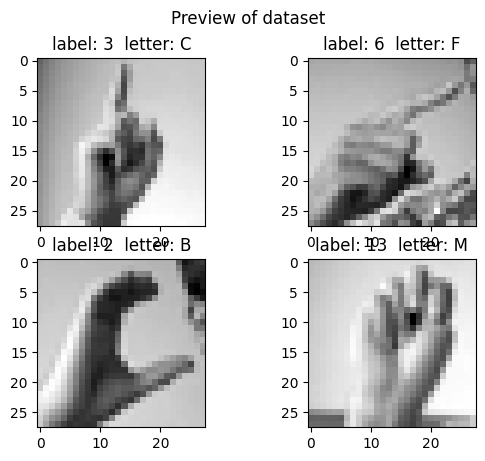

In [ ]:
# fig,axe=plt.subplots(2,2)
# fig.suptitle('Preview of dataset')
# axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
# axe[0,0].set_title('label: 3  letter: C')
# axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
# axe[0,1].set_title('label: 6  letter: F')
# axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
# axe[1,0].set_title('label: 2  letter: B')
# axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
# axe[1,1].set_title('label: 13  letter: M')

Text(0.5, 1.0, 'Frequency of each label')

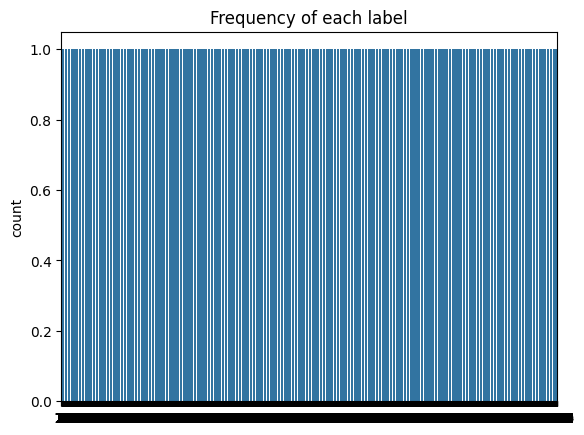

In [ ]:
# sns.countplot(train_label)
# plt.title("Frequency of each label")

In [ ]:
# model=Sequential()
# model.add(Conv2D(128,kernel_size=(5,5),
#                  strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
# model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
# model.add(Conv2D(64,kernel_size=(2,2),
#                 strides=1,activation='relu',padding='same'))
# model.add(MaxPool2D((2,2),2,padding='same'))
# model.add(Conv2D(32,kernel_size=(2,2),
#                 strides=1,activation='relu',padding='same'))
# model.add(MaxPool2D((2,2),2,padding='same'))

# model.add(Flatten())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model.add(Dense(units=512,activation='relu'))
# model.add(Dropout(rate=0.25))
# model.add(Dense(units=24,activation='softmax'))
# model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,352 (1.22 MB)

 Trainable params: 319,352 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
#          epochs = 35,
#           validation_data=(X_test,y_test),
#           shuffle=1
#          )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.0465 - loss: nan - val_accuracy: 0.0439 - val_loss: nan
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 959ms/step - accuracy: 0.0472 - loss: nan - val_accuracy: 0.0439 - val_loss: nan
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.0500 - loss: nan - val_accuracy: 0.0439 - val_loss: nan
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 890ms/step - accuracy: 0.0430 - loss: nan - val_accuracy: 0.0439 - val_loss: nan
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 920ms/step - accuracy: 0.0418 - loss: nan - val_accuracy: 0.0439 - val_loss: nan
Epoch 6/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 943ms/step - accuracy: 0.0448 - loss: nan - val_accuracy: 0.0439 - val_loss: nan
Epoch 7/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 995ms/step - accuracy: 0.0468 - loss: nan - val_accuracy: 0.0439 - val_loss: nan
Epoch 8/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 914ms/step - accuracy: 0.0486 - loss: nan - val_accuracy: 0.0439 - val_loss: nan
Epoch 9/35
21/21 ━━━━━

In [ ]:
# (ls,acc)=model.evaluate(x=X_test,y=y_test)

152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.0436 - loss: nan


In [ ]:
# print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 4.386509582400322%


In [ ]:
# ✅ 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# ✅ 2. Load Dataset
train_df = pd.read_csv('/content/sign_mnist_train.csv')  # <-- replace with your actual path
test_df = pd.read_csv('/content/sign_mnist_test.csv')

In [ ]:
# ✅ 3. Preprocessing
# Separate features and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

In [ ]:
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [ ]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

In [ ]:
# ✅ 4. Build Improved CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')  # 25 classes (A-Z except J & Z)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ✅ 5. Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ✅ 6. Train Model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.0980 - loss: 3.7401 - val_accuracy: 0.0705 - val_loss: nan
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.3098 - loss: 2.3463 - val_accuracy: 0.0434 - val_loss: nan
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.4416 - loss: 1.7789 - val_accuracy: 0.0398 - val_loss: nan
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.5785 - loss: 1.3091 - val_accuracy: 0.0398 - val_loss: nan
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.6628 - loss: 0.9994 - val_accuracy: 0.0759 - val_loss: nan
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7388 - loss: 0.7659 - val_accuracy: 0.0561 - val_loss: nan
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.7961 - loss: 0.6129 - val_accuracy: 0.1139 - val_loss: nan
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8313 - loss: 0.5131 - val_accuracy: 0.1175 - val_loss: nan
Epoc

In [ ]:
# ✅ 7. Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

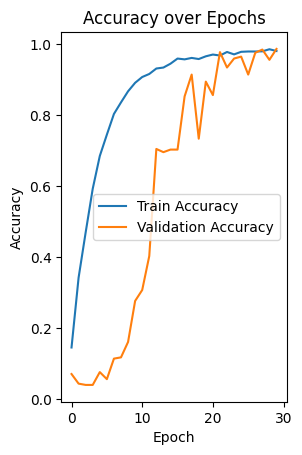

In [ ]:
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

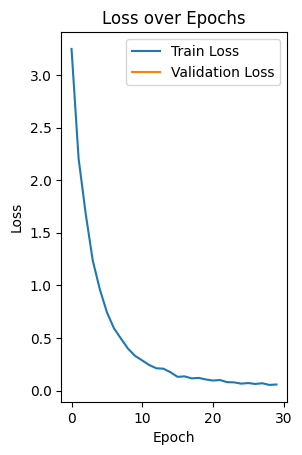

In [ ]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# ✅ 8. Evaluate on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9173 - loss: nan
Test Accuracy: 91.68%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# ✅ Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


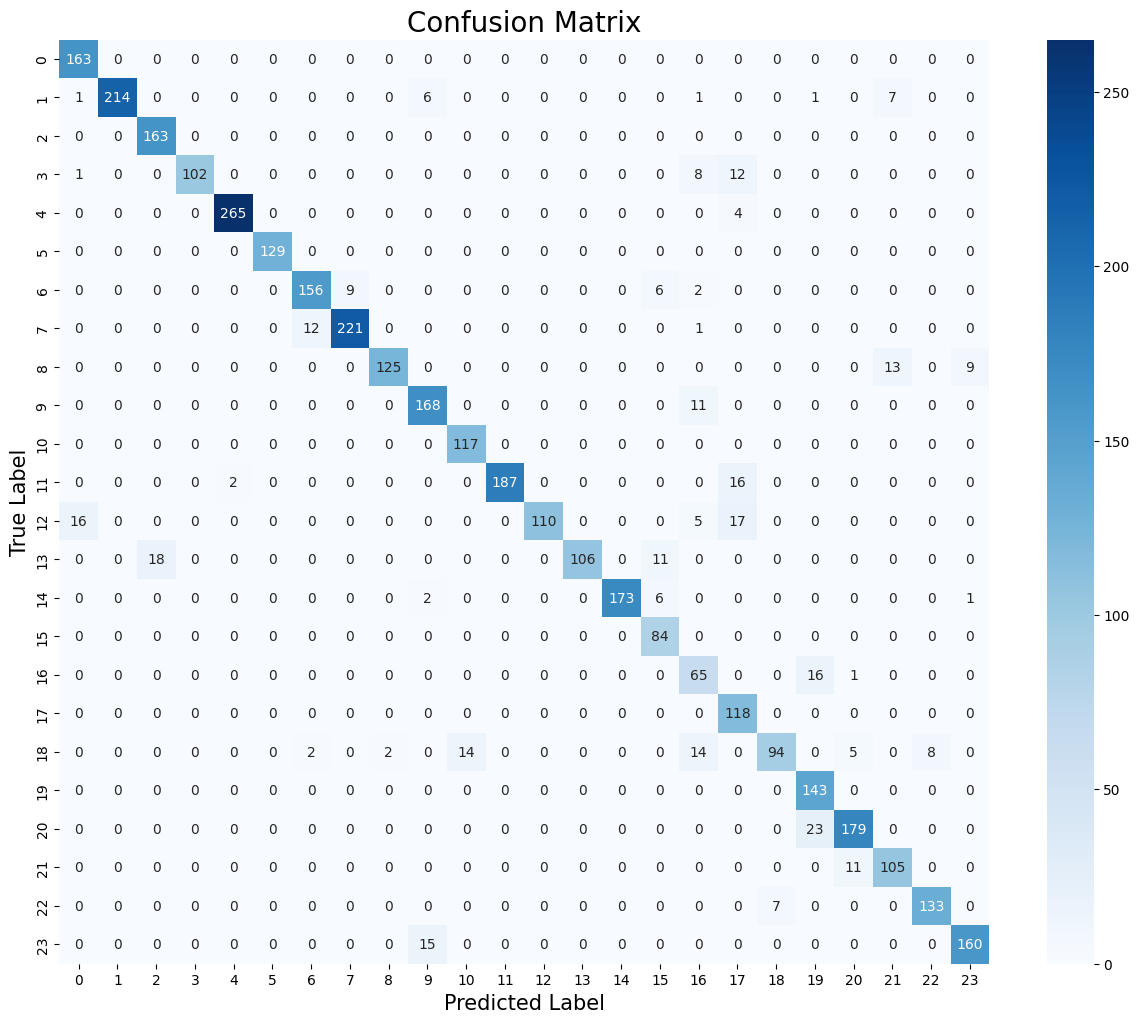

In [ ]:
# ✅ Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)
plt.show()

In [ ]:
# ✅ Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       163
           1       1.00      0.93      0.96       230
           2       0.90      1.00      0.95       163
           3       1.00      0.83      0.91       123
           4       0.99      0.99      0.99       269
           5       1.00      1.00      1.00       129
           6       0.92      0.90      0.91       173
           7       0.96      0.94      0.95       234
           8       0.98      0.85      0.91       147
          10       0.88      0.94      0.91       179
          11       0.89      1.00      0.94       117
          12       1.00      0.91      0.95       205
          13       1.00      0.74      0.85       148
          14       1.00      0.79      0.88       135
          15       1.00      0.95      0.97       182
          16       0.79      1.00      0.88        84
          17       0.61      0.79      0.69        82
  

In [ ]:
# ✅ Find misclassified indices
errors = np.where(y_pred_classes != y_true_classes)[0]

print(f"Number of misclassified images: {len(errors)}")

Number of misclassified images: 316


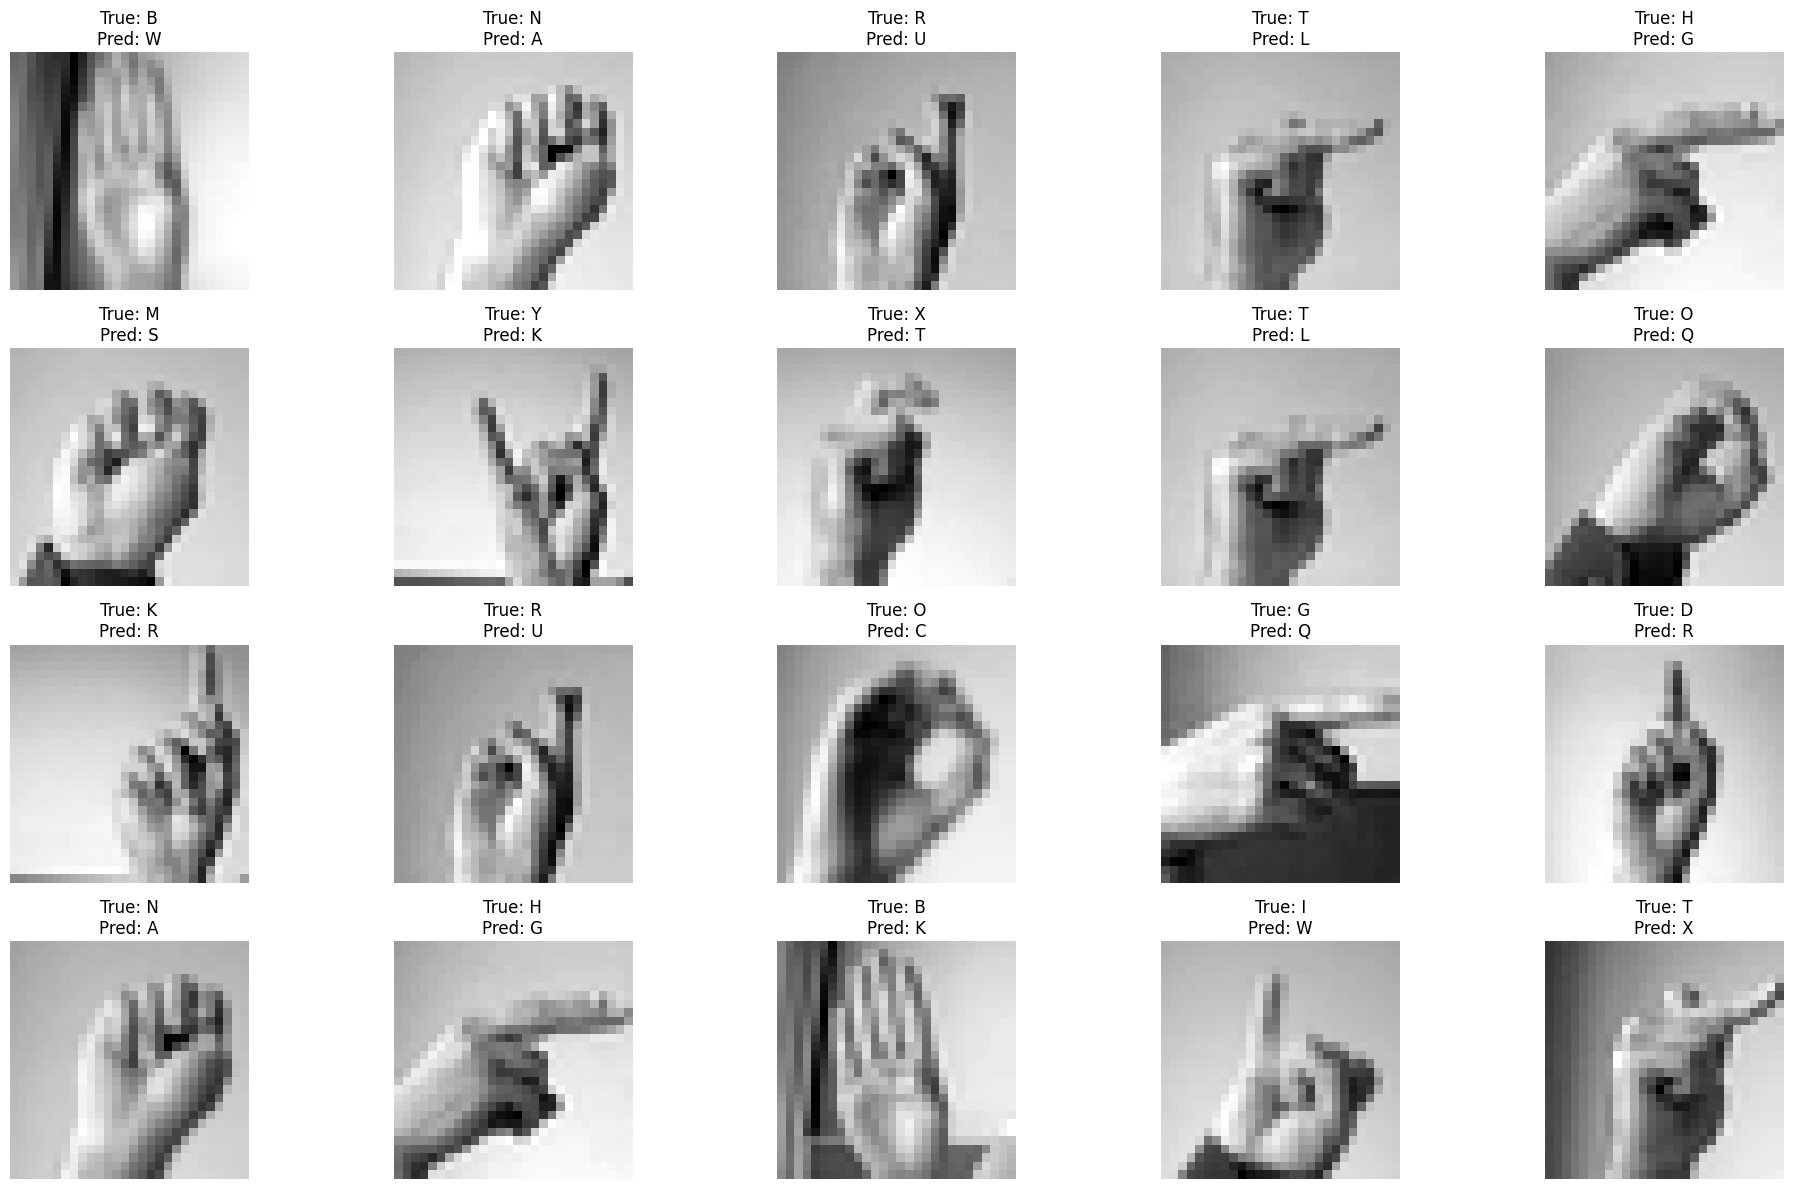

In [ ]:
# ✅ Plot some misclassified examples
plt.figure(figsize=(20, 12))

for i, error_idx in enumerate(errors[:20]):  # showing first 20 errors
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[error_idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {chr(y_true_classes[error_idx] + 65)}\nPred: {chr(y_pred_classes[error_idx] + 65)}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# ✅ After training and evaluation

# Final training metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

In [ ]:
# Test metrics
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("🔹 Final Model Metrics 🔹")
print(f"Training Accuracy   : {final_train_acc*100:.2f}%")
print(f"Validation Accuracy : {final_val_acc*100:.2f}%")
print(f"Test Accuracy       : {test_acc*100:.2f}%")
print(f"Training Loss       : {final_train_loss:.4f}")
print(f"Validation Loss     : {final_val_loss:.4f}")
print(f"Test Loss           : {test_loss:.4f}")

🔹 Final Model Metrics 🔹
Training Accuracy   : 98.14%
Validation Accuracy : 98.73%
Test Accuracy       : 91.68%
Training Loss       : 0.0580
Validation Loss     : nan
Test Loss           : nan
